In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import scipy.integrate as spi
import time

## Applied Math 10: Computing for Science and Engineering
<br>

### Lab 6 : Elementary - Numerical Integration of functions

**Spring 2020**<br/>
<br>
**Instructor**: K. Indireshkumar (Kumar)<br/>
**Material**: K. Indireshkumar (Kumar)

### Learning Goals of Lab 

This lab concentrates on calculating integrals using the rectangular, trapezoidal approximations, and the Simpson's method. By the end of this lab, you will be familiar with:
- writing functions for the rectangular, trapezoid, and Simpson's approximations
- using the functions for calculting integrals 
- relative accuracies of the three methods

#### A few suggestions:
- Have your lecture notebook open
- Always try to graph the function you are trying to integrate 

Reference on numpy functions¶
https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.math.html

###  Functions for Rectangular, trapezoidal, and rectangular approximations

In Lecture 6, three methods for approximating a definite integral were explored. It is convenient to cast the methods as functions that can be reused for calculating any integral. We will start by writing a function for the rectangular approximation. Recall the expression for the integral using the rectangular method is:

$$ I(a,b) \approx \sum_{n=0}^N f(x_n) \Delta x + {\cal O}[(\Delta x)^2]$$

The following function implements the above approximation for any function $f$ that has been discretized between the limits $xmin$ and $xmax$. The second term is the error in this approximation (you will not include that in the code).

In [2]:
def rectnv(f, xmin, xmax):
    # The input is: discretized values of the function, f;
    #               limits of integration, xmin and xmax
    # The output is: the integral of the function f between
    #                the limits xmin and xmax
    
    #Find Nx from the discretized function f

    Nx=len(f)-1
    
    #Find Dx 
    
    Dx = (xmax - xmin) / Nx
    
    #Write the expression for integral
    
    Ints = Dx * np.sum(f)-Dx*f[Nx]
    
    return Ints

In [3]:
# This is the same function that was used as an example in Lecture 6.

def fofx(x):
# check to make sure function does not blow up
    if x==1.0:
        return 0.0
    else:
        return np.cos(4.0*np.pi*x)/np.sqrt(1.0-x)


Iexact=-0.115881

In [4]:
#Define the limits and discretize the function

xmin=-np.pi/4.0
xmax=np.pi/4.0
Nx=64
x=np.linspace(xmin,xmax,Nx+1)
f=np.zeros(Nx+1)
for n in range(Nx+1):
    f[n]=fofx(x[n])

In [5]:
#Call the function rectnv to compute the approximate value of the integral.
I_rect=rectnv(f, xmin, xmax)
print(I_rect)

-0.09968755411904563


#### The trapezoidal method

From Lecture 6, recall the trapezoidal approximation for the integral is:

$$ I(a,b) \approx \frac{1}{2} \left [ f(x_0) + 2 \sum_{n=1}^{N-1} f(x_n) + f(x_{N}) \right ] \Delta x + {\cal O}[(\Delta x)^3]$$

As the second term indicates, this method is more accurate than the rectangular method.

**Exercise 1: Write a function for the trapezoidal method.** 

The function should take as input:
- the Discretized function whose integral needs to be evaluated
- the integration limits (xmin and xmax)

The function should return:
- the integral

In [6]:
# Trapezoidal approximation template

def trapznv(f, xmin, xmax):
    
    ''' 1) Put here your comments about the input 
           and output of your code
        2) Compute the number of intervals - Nx
        3) Find the interval size -- Dx
        4) Compute the integral
    '''
    # The input is: discretized values of the function, f;
    #               limits of integration, xmin and xmax
    # The output is: the integral of the function f between
    #                the limits xmin and xmax
    
    #Find Nx from the discretized function f

    Nx= len(f) - 1
    
    #Find Dx 
    
    Dx = (xmax - xmin) / Nx
    
    #Write the expression for integral
    
    Ints = (Dx * np.sum(f)) - (.5*Dx*f[0]) - (.5*Dx*f[Nx]) # Look at trapezoidal formula!!

    return Ints

#### The Simpson's method

Again, from Lecture 6, recall resulting expression for the Simpson's approximation is:

$$ I(a,b) \approx \frac{1}{3} \left [ f(x_0) + 4 \sum_{n=1}^{N/2} f(x_{2n-1}) 
+ 2 \sum_{n=1}^{N/2-1} f(x_{2n}) + f(x_{N}) \right ] \Delta x + {\cal O}[(\Delta x)^4]$$

where $N$ must be an even number. As indicated by the error term (second term above), this method is more accurate than the trapezoidal method.

**A function for the Simpson method.**

The function should take as input:
- the Discretized function whose integral needs to be evaluated
- the integration limits (xmin and xmax)

The function should return:
- the integral

In [7]:
def simpnv(f, xmin, xmax):
    
    # The input is: discretized values of the function, f;
    #               limits of integration, xmin and xmax
    # The output is: the integral of the function f between
    #                the limits xmin and xmax
    
    # Find Nx and Dx
    
    Nx=len(f)-1
    Dx = (xmax - xmin) / Nx
    
    sum1 = 0.0
    sum2 = 0.0
    
    #Compute the sums for even and odd terms
    
    for n in range(1, Nx):
        if n % 2 == 1:    # check n is odd and compute sum1
            sum1 += f[n]  
        if n % 2 == 0:    # check n is even and compute sum2 
            sum2 += f[n]  
    
    Ints = (1.0 / 3.0) * Dx * (f[0] + 4.0 * sum1 + 2.0 * sum2 + f[Nx])
    
    return Ints

## Problem 1

Using the functions you have constructed, evaluate the following integral:
$$\int_{\pi/3}^{2\pi/3} \sin{x^6} dx$$

Evaluate the integral for values of Nx from 16 to 1048576 (as done in class) using functions you wrote and compare it to the exact value (0.0665582).

In [9]:
# Function definition
def gofx(x):
    return np.sin(x**6)

Iexact1=0.0665582

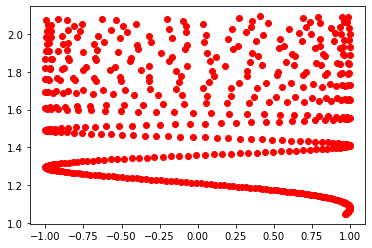

In [19]:
#Define the limits of integration and discretize
#the independent variable and the function.
# Plot the function for a few values of Nx (say for 64, 512) to get a feel for what to expect.

xmin= np.pi/3.0
xmax= 2*np.pi/3.0
Nx=512
x=np.linspace(xmin,xmax,Nx+1)
g=np.zeros(Nx+1)
for n in range(Nx+1):
    g[n]=gofx(x[n])
    
plt.plot(g, x, 'ro')
plt.show()

In [20]:
# We will calculate the integral 

Ms=9
for m in range(Ms):
    Nx=4**(m+2) # N is the number of segments increasing over time
    Dx=(xmax-xmin)/Nx
    x=np.linspace(xmin,xmax,Nx+1)
    g=np.zeros(Nx+1)
    for n in range(Nx+1):
        g[n]=gofx(x[n])

    # Now you have discretized function and the limits of
    # integration. Compute the integral using Rectangular,
    # trapezoid and Simpson's methods

    Intrect= rectnv(g, xmin, xmax)
    Inttrap= trapznv(g, xmin, xmax)
    Intsimp= simpnv(g, xmin, xmax)

    # Print the results. Note: exact answer=0.0665582
    
    print('%8i'%Nx,'%12.7f'%Intrect,'%12.7f'%Inttrap,'%12.7f'%Intsimp)

      16    0.1467912    0.1284800    0.1090597
      64    0.0641971    0.0596193    0.0189240
     256    0.0673873    0.0662428    0.0665805
    1024    0.0668249    0.0665388    0.0665583
    4096    0.0666285    0.0665570    0.0665582
   16384    0.0665760    0.0665582    0.0665582
   65536    0.0665627    0.0665582    0.0665582
  262144    0.0665594    0.0665582    0.0665582
 1048576    0.0665585    0.0665582    0.0665582
